In [ ]:
#Importamos las librerias principales
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Cargamos el dataset 
titanic = pd.read_csv("C:\\Users\\abuen\\OneDrive\\00 - BUSINNESS INTELLIGENCE\\MODULO_2\\DATASET\\titanic.csv")

## Exploracion de datos 

In [ ]:
## Visualizacion del dataframe
titanic.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
## Eliminamos las columnas que no nos aportan valor
columns_to_drop = ["Unnamed: 0", "fare", "embark_town",]
titanic.drop(columns_to_drop, axis = "columns", inplace=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,embarked,class,who,adult_male,deck,alive,alone
0,0,3,male,22.0,1,0,S,Third,man,True,NaN,no,False
1,1,1,female,38.0,1,0,C,First,woman,False,C,yes,False
2,1,3,female,26.0,0,0,S,Third,woman,False,NaN,yes,True
3,1,1,female,35.0,1,0,S,First,woman,False,C,yes,False
4,0,3,male,35.0,0,0,S,Third,man,True,NaN,no,True


In [ ]:
## Renombrar el nombre de las columnas
titanic.columns = ["Survived", "Pclass", "Sex", "Age", "SiSp", "Parch", "Embarked" , "Class", "Who", "Adulte_male", "Deck", "Alive", "Alone"]
titanic.head()

,Survived,Pclass,Sex,Age,SiSp,Parch,Embarked,Class,Who,Adulte_male,Deck,Alive,Alone
0,0,3,male,22.0,1,0,S,Third,man,True,NaN,no,False
1,1,1,female,38.0,1,0,C,First,woman,False,C,yes,False
2,1,3,female,26.0,0,0,S,Third,woman,False,NaN,yes,True
3,1,1,female,35.0,1,0,S,First,woman,False,C,yes,False
4,0,3,male,35.0,0,0,S,Third,man,True,NaN,no,True


In [ ]:
## Analizar el Shape del objeto 
print(titanic.shape)

(891, 13)


In [ ]:
## Visualizamos los tipos de datos
titanic.dtypes

Survived         int64
Pclass           int64
Sex             object
Age            float64
SiSp             int64
Parch            int64
Embarked        object
Class           object
Who             object
Adulte_male       bool
Deck            object
Alive           object
Alone             bool
dtype: object

In [ ]:
## Cambiamos los tipos de datos 
titanic = pd.get_dummies(titanic, columns=["Sex"], drop_first=True)

In [ ]:
## Validamos el cambio
titanic.dtypes

Survived         int64
Pclass           int64
Age            float64
SiSp             int64
Parch            int64
Embarked        object
Class           object
Who             object
Adulte_male       bool
Deck            object
Alive           object
Alone             bool
Sex_male          bool
dtype: object

In [ ]:
titanic.head()


,Survived,Pclass,Age,SiSp,Parch,Embarked,Class,Who,Adulte_male,Deck,Alive,Alone,Sex_male
0,0,3,22.0,1,0,S,Third,man,True,NaN,no,False,True
1,1,1,38.0,1,0,C,First,woman,False,C,yes,False,False
2,1,3,26.0,0,0,S,Third,woman,False,NaN,yes,True,False
3,1,1,35.0,1,0,S,First,woman,False,C,yes,False,False
4,0,3,35.0,0,0,S,Third,man,True,NaN,no,True,True


In [ ]:
## Renombramos la columna 
titanic.rename(columns={"Sex_male": "Sex"}, inplace=True)
titanic.head()

,Survived,Pclass,Age,SiSp,Parch,Embarked,Class,Who,Adulte_male,Deck,Alive,Alone,Sex
0,0,3,22.0,1,0,S,Third,man,True,NaN,no,False,True
1,1,1,38.0,1,0,C,First,woman,False,C,yes,False,False
2,1,3,26.0,0,0,S,Third,woman,False,NaN,yes,True,False
3,1,1,35.0,1,0,S,First,woman,False,C,yes,False,False
4,0,3,35.0,0,0,S,Third,man,True,NaN,no,True,True


In [ ]:
titanic = titanic[["Survived", "Pclass", "Sex", "Age" , "SiSp", "Parch"]]
titanic.head()

,Survived,Pclass,Sex,Age,SiSp,Parch
0,0,3,True,22.0,1,0
1,1,1,False,38.0,1,0
2,1,3,False,26.0,0,0
3,1,1,False,35.0,1,0
4,0,3,True,35.0,0,0


### Entrenamiento de arbol de decision con Scikit - Learn

In [ ]:
## Separamos en X e Y 
X = titanic.drop("Survived", axis = 1)
Y = titanic.Survived


In [ ]:
# Importamos las librerias necesarias para la creacion del modelo 
from sklearn.model_selection import train_test_split

# Supongamos que X son tus datos y y son tus etiquetas - 30% de nuestros datos para el testeo y 70% para nuestro entrenamiento 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=00000)


In [ ]:
# Arbol de decision 
from sklearn.tree import DecisionTreeClassifier

# Creacion del modelo 
tree = DecisionTreeClassifier(max_depth=2, random_state=00000)


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

# Rellenar NaN en los datos de entrada
imputer = SimpleImputer(strategy='mean')  
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Crear y entrenar el modelo
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

### Entrenamiento del Modelo 

In [ ]:
# Calculo de las predicciones Train y Test 
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)


In [ ]:
# Calculo de las metricas 
from sklearn.metrics import accuracy_score

#Calculamos accuracy train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculamos accuracy test 
test_accuracy = accuracy_score(y_test, y_test_pred)

print("El accuracy en train es: ", train_accuracy)
print("El accuracy en test es: ", test_accuracy)

El accuracy en train es:  0.922752808988764
El accuracy en test es:  0.7932960893854749


C:\Users\abuen\AppData\Local\Temp\ipykernel_6108\1950140894.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features, y=importances_ordered, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)


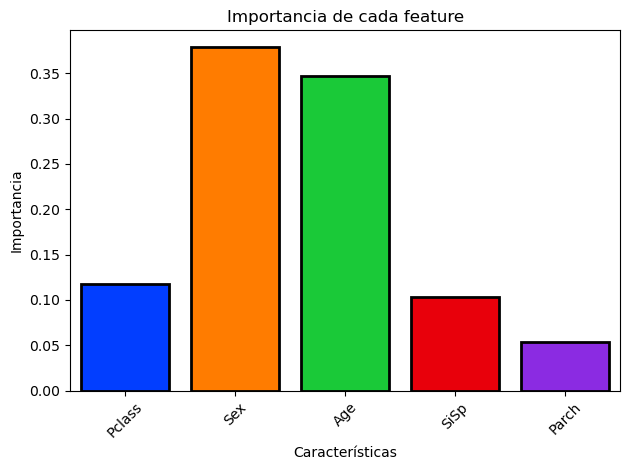

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aseguramos que las variables estén en el mismo orden que en la lista original
features = ['Pclass', 'Sex', 'Age', 'SiSp', 'Parch']  # Tu orden específico

# Obtenemos las importancias en ese mismo orden
importances = tree.feature_importances_
importances_dict = dict(zip(X.columns, importances))  # Convertimos a diccionario para reordenar

# Reordenamos según la lista de features que definiste
importances_ordered = [importances_dict[feature] for feature in features]

# Graficamos
sns.barplot(x=features, y=importances_ordered, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title("Importancia de cada feature")
plt.ylabel("Importancia")
plt.xlabel("Características")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predicciones sobre el conjunto de prueba
y_pred = tree.predict(X_test)

# Reporte detallado por clase
print("\n Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred, target_names=["No sobrevivió", "Sobrevivió"]))

# Precisión general del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión total del modelo: {accuracy:.2%}")


 Reporte de Clasificación:

               precision    recall  f1-score   support

No sobrevivió       0.81      0.87      0.84       110
   Sobrevivió       0.77      0.67      0.71        69

     accuracy                           0.79       179
    macro avg       0.79      0.77      0.78       179
 weighted avg       0.79      0.79      0.79       179


Precisión total del modelo: 79.33%


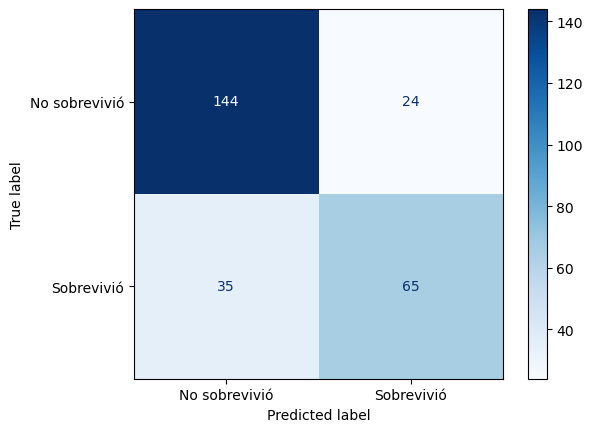

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)

# Mostrar la matriz con etiquetas específicas del problema Titanic
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["No sobrevivió", "Sobrevivió"])
disp.plot(cmap="Blues")  # Opcional: para mejor visualización


In [ ]:
from sklearn.metrics import classification_report

# Suponiendo que ya hiciste las predicciones
y_test_pred = tree.predict(X_test)

# Reporte de clasificación
report = classification_report(y_test, y_test_pred)
print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       168
           1       0.73      0.65      0.69       100

    accuracy                           0.78       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.78      0.78      0.78       268

